In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Algorytm Greedy Nearest

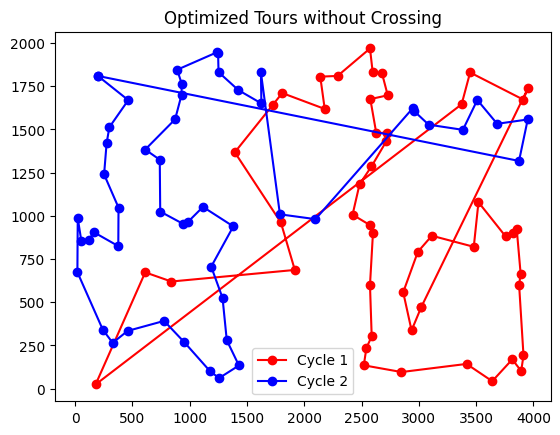

In [84]:

np.random.seed(420)

def calculate_distance(city1, city2):
    return np.round(np.linalg.norm(city1 - city2))

def create_alternate_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([calculate_distance(cities[tour1[0]], cities[i]) for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    
    while unvisited:
        current_city = tour1[-1]

        # Calculate distances to unvisited cities
        distances1 = [calculate_distance(cities[current_city], cities[j]) for j in unvisited]
        closest_city1 = unvisited.pop(np.argmin(distances1))
        tour1.append(closest_city1)
    
        if unvisited:
            current_city = tour2[-1]

            # Calculate distances to unvisited cities
            distances2 = [calculate_distance(cities[current_city], cities[j]) for j in unvisited]
            closest_city2 = unvisited.pop(np.argmin(distances2))
            tour2.append(closest_city2)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# # Add text box with information
# N = data.shape[0]
# total_length_cycle1 = sum(calculate_distance(positions[cycle1[i-1]], positions[cycle1[i]]) for i in range(N))
# total_length_cycle2 = sum(calculate_distance(positions[cycle2[i-1]], positions[cycle2[i]]) for i in range(N))
# textstr = "N nodes: %d\nTotal length cycle 1: %.3f\nTotal length cycle 2: %.3f" % (N, total_length_cycle1, total_length_cycle2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Create two separate cycles without lines crossing
cycle1, cycle2 = create_alternate_cycles(positions)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

## Algorytm Greedy

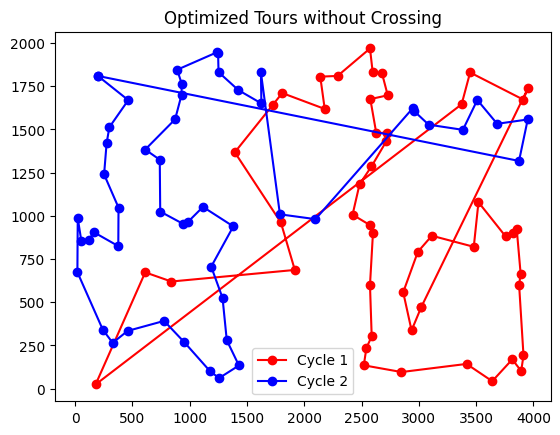

In [85]:
np.random.seed(420)


def calculate_distance(city1, city2):
    return np.round(np.linalg.norm(city1 - city2))

def create_greedy_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]
    nearest_to_first_1 = [calculate_distance(cities[tour1[0]], cities[j]) for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_first_1)))

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([calculate_distance(cities[tour1[0]], cities[i]) for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    nearest_to_first_2 = [calculate_distance(cities[tour2[0]], cities[j]) for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_first_2)))

    while unvisited:

        # current_cycle_distance_1=[]
        # for x in range(len(tour1)-1):
        #     current_cycle_distance_1.append(calculate_distance(cities[tour1[x]], cities[tour1[x+1]]))
        # max_distance_1=np.sum(current_cycle_distance_1)

        # current_cycle_distance_2=[]
        # for x in range(len(tour2)-1):
        #     current_cycle_distance_2.append(calculate_distance(cities[tour2[x]], cities[tour2[x+1]]))
        # max_distance_2=np.sum(current_cycle_distance_2)

        # dystans od pierwszego elementu do ostatniego
        max_distance_1=np.sum([calculate_distance(cities[tour1[x]], cities[tour1[x+1]]) for x in range(len(tour1)-1) ])
        max_distance_2=np.sum([calculate_distance(cities[tour2[x]], cities[tour2[x+1]]) for x in range(len(tour2)-1) ])


        last_city_1 = tour1[-1]
        start_city_1 = tour1[-1]

        best_distance_1=float('inf')
        #####
        ##### TU SKOŃCZYŁEM    
        #####
        # Calculate distances to unvisited cities

        for place in unvisited:
            distance_from_last_to_new_point_1 = calculate_distance(cities[last_city_1], cities[place])
            distance_from_new_to_first_point_1 = calculate_distance(cities[place], cities[start_city_1])
            new_distance_1 = distance_from_last_to_new_point_1 + distance_from_new_to_first_point_1
            if new_distance_1 < best_distance_1:
                best_distance_1=new_distance_1
                best_place_1=place

        # distances1 = [calculate_distance(cities[current_city], cities[j]) for j in unvisited]
        # closest_city1 = unvisited.pop(np.argmin(distances1))
        unvisited.remove(best_place_1)
        tour1.append(best_place_1)


        if unvisited:
            last_city_2 = tour2[-1]
            start_city_2 = tour2[-1]

            best_distance_2=float('inf')
            #####
            ##### TU SKOŃCZYŁEM    
            #####
            # Calculate distances to unvisited cities

            for place in unvisited:
                distance_from_last_to_new_point_2 = calculate_distance(cities[last_city_2], cities[place])
                distance_from_new_to_first_point_2 = calculate_distance(cities[place], cities[start_city_2])
                new_distance_2 = distance_from_last_to_new_point_2 + distance_from_new_to_first_point_2
                if new_distance_2 < best_distance_2:
                    best_distance_2=new_distance_2
                    best_place_2=place

            # distances1 = [calculate_distance(cities[current_city], cities[j]) for j in unvisited]
            # closest_city1 = unvisited.pop(np.argmin(distances1))
            unvisited.remove(best_place_2)
            tour2.append(best_place_2)


    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# # Add text box with information
# N = data.shape[0]
# total_length_cycle1 = sum(calculate_distance(positions[cycle1[i-1]], positions[cycle1[i]]) for i in range(N))
# total_length_cycle2 = sum(calculate_distance(positions[cycle2[i-1]], positions[cycle2[i]]) for i in range(N))
# textstr = "N nodes: %d\nTotal length cycle 1: %.3f\nTotal length cycle 2: %.3f" % (N, total_length_cycle1, total_length_cycle2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Create two separate cycles without lines crossing
cycle1, cycle2 = create_greedy_cycles(positions)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

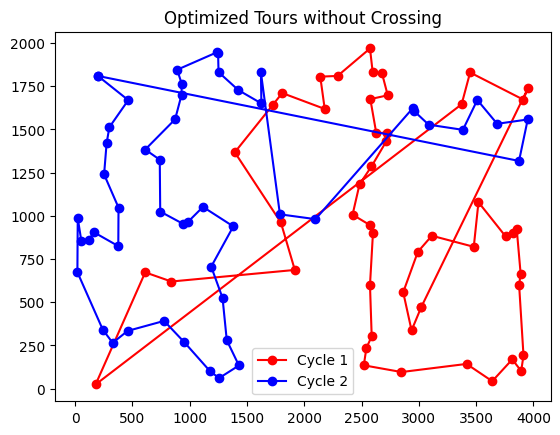

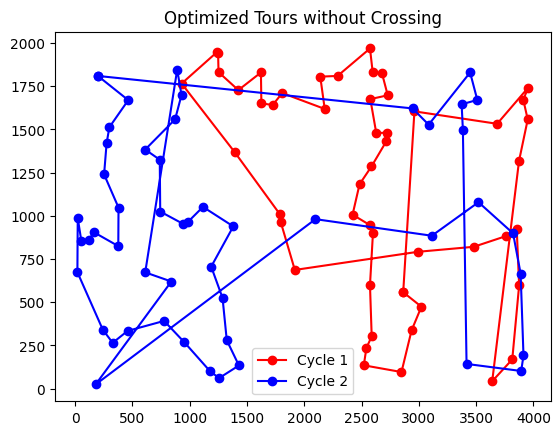

In [86]:
np.random.seed(420)

cycle1_a, cycle2_a = create_alternate_cycles(positions)

cycle1, cycle2 = create_greedy_cycles(positions)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1_a, cycle2_a)
plot_optimized_tours(positions, cycle1, cycle2)

## Algorytm 2-regret

In [87]:
# code